<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


 - 年齢層と特定の年齢範囲にわたる補償の傾向を追跡します。

 - 体験レベルに基づいて仕事の満足度の傾向を分析します。

 - ラインチャートを探索して解釈して、パターンとトレンドを特定します。


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
# !pip install pandas


In [2]:
# !pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [6]:
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'


#### Step 2: Import necessary libraries and load the dataset


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
sns.set_palette("pastel")
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.0})


#### Load the data


In [7]:
df = pd.read_csv(url)


#### Display the first few rows to understand the structure of the data


In [9]:
pd.set_option('display.max_columns', None)
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


 - 毎年の補償の中央値が異なる年齢層でどのように変化するかを追跡します。

 - 行チャートを使用して、これらの傾向を視覚化します。

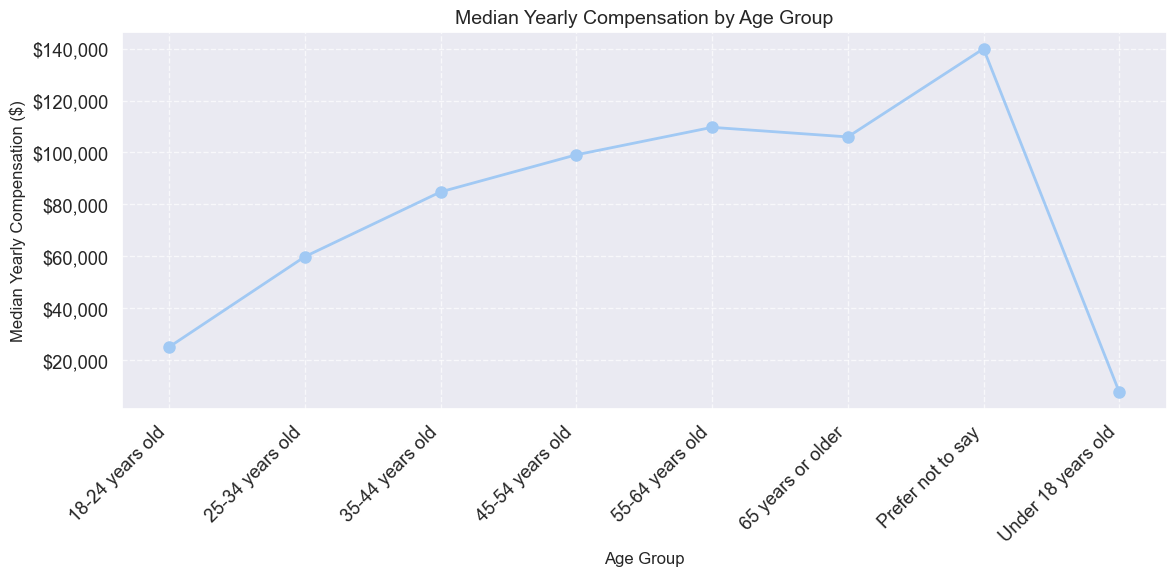

In [10]:
## Write your code here
# Calculate median compensation by age group
age_comp_median = df.groupby('Age')['ConvertedCompYearly'].median().reset_index()

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(age_comp_median['Age'], age_comp_median['ConvertedCompYearly'], 
         marker='o', linewidth=2, markersize=8)

# Customize the plot
plt.title('Median Yearly Compensation by Age Group', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Yearly Compensation ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis labels as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()




##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


よく見ると、25歳から45歳までの回答者の補償の中央値に焦点を当てたラインチャートをプロットします。


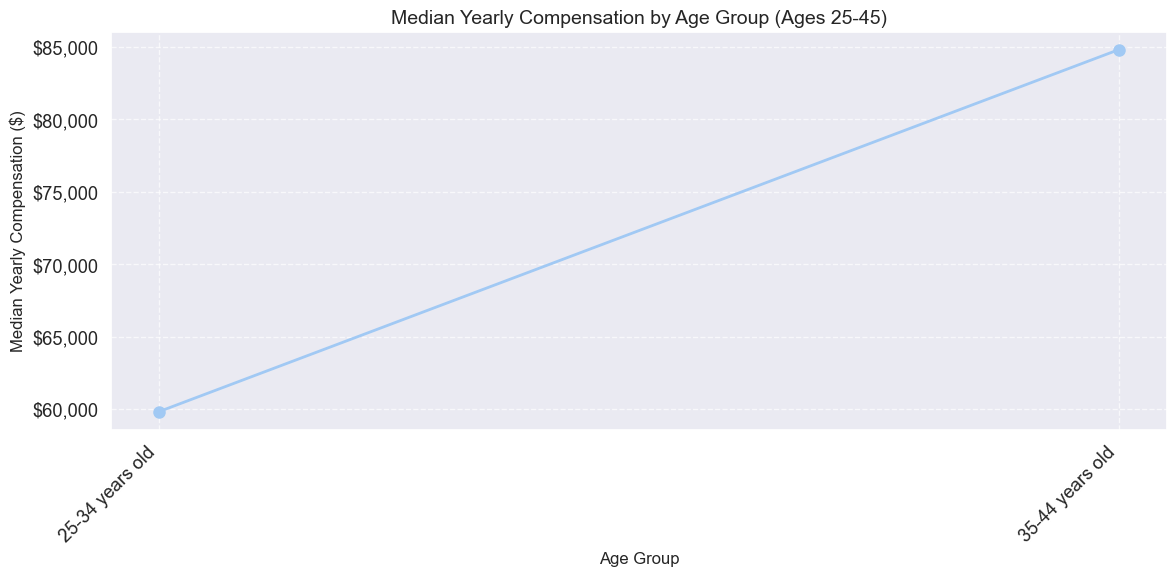

In [11]:
## Write your code here

# Filter data for ages 25-45
age_range = ['25-34 years old', '35-44 years old']
age_comp_filtered = age_comp_median[age_comp_median['Age'].isin(age_range)]

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(age_comp_filtered['Age'], age_comp_filtered['ConvertedCompYearly'],
         marker='o', linewidth=2, markersize=8)

# Customize the plot
plt.title('Median Yearly Compensation by Age Group (Ages 25-45)', fontsize=14)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Median Yearly Compensation ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Format y-axis labels as currency
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


 -エクスペリエンスレベルに近い列を使用して、仕事の満足度が経験とともにどのように変化するかを分析します。

 -必要に応じて、利用可能なエクスペリエンス関連の列を「Experience」に置き換えます。


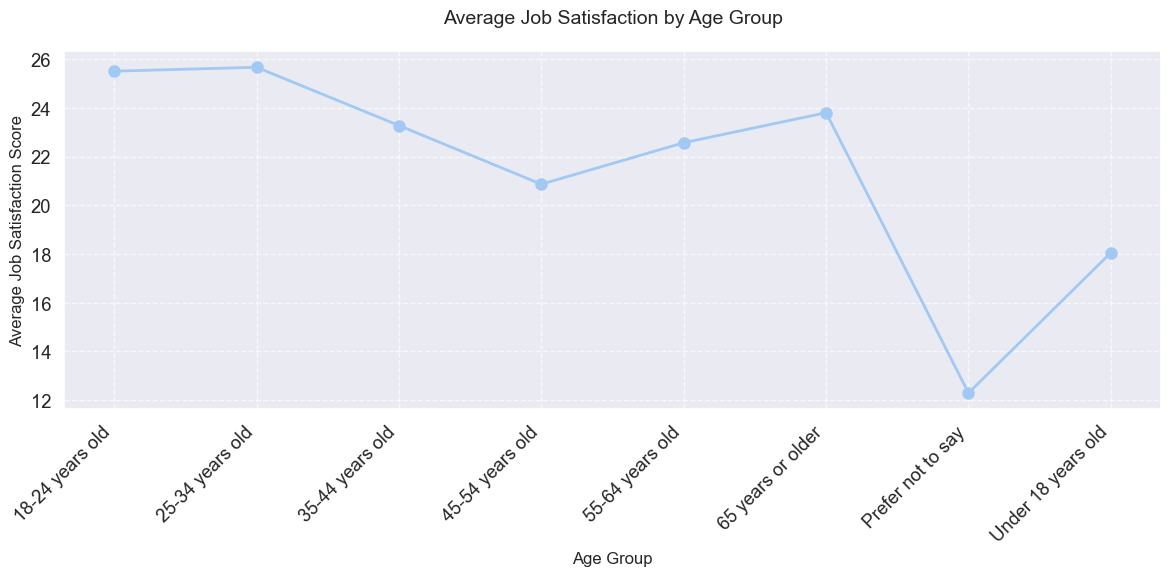

In [12]:
## Write your code here

# Group by Age and calculate mean JobSatPoints_6 for each age group
age_satisfaction = df.groupby('Age')['JobSatPoints_6'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(age_satisfaction['Age'], age_satisfaction['JobSatPoints_6'], 
         marker='o', linewidth=2, markersize=8)

# Customize the chart
plt.title('Average Job Satisfaction by Age Group', fontsize=14, pad=20)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Average Job Satisfaction Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()


### Task 3: Trends in Job Satisfaction and Compensation by Experience


##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


##### 1.経験レベルでcompyearlyの中央値のチャートのラインチャート

 -このラインチャートは、補償の中央値（「compcearlyly」の変化の中央値（「変換）がどのように変化するかを追跡します。

 -「workexp」などの列を使用します。

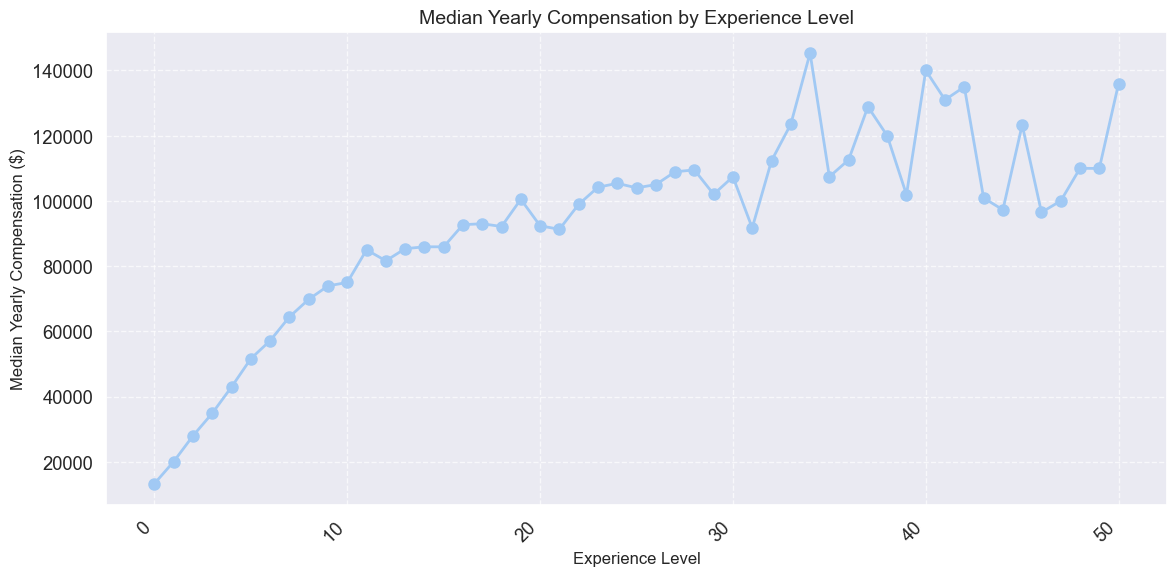

In [13]:
## Write your code here

# Group by WorkExp and calculate median ConvertedCompYearly for each experience level
exp_comp_median = df.groupby('WorkExp')['ConvertedCompYearly'].median().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(exp_comp_median['WorkExp'], exp_comp_median['ConvertedCompYearly'],
         marker='o', linewidth=2, markersize=8)

# Customize the chart           
plt.title('Median Yearly Compensation by Experience Level', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Median Yearly Compensation ($)', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()
        

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


##### 2.エクスペリエンスレベル全体の仕事の満足度（ `jobesatpoints_6`）のラインチャート

 -エクスペリエンスレベルに基づいて、仕事の満足度の傾向（ `jowsatpoints_6`）を調査するためのラインチャートを作成します。

 -このチャートは、満足度が時間の経過に伴う経験とどのように相関するかについての洞察を提供します

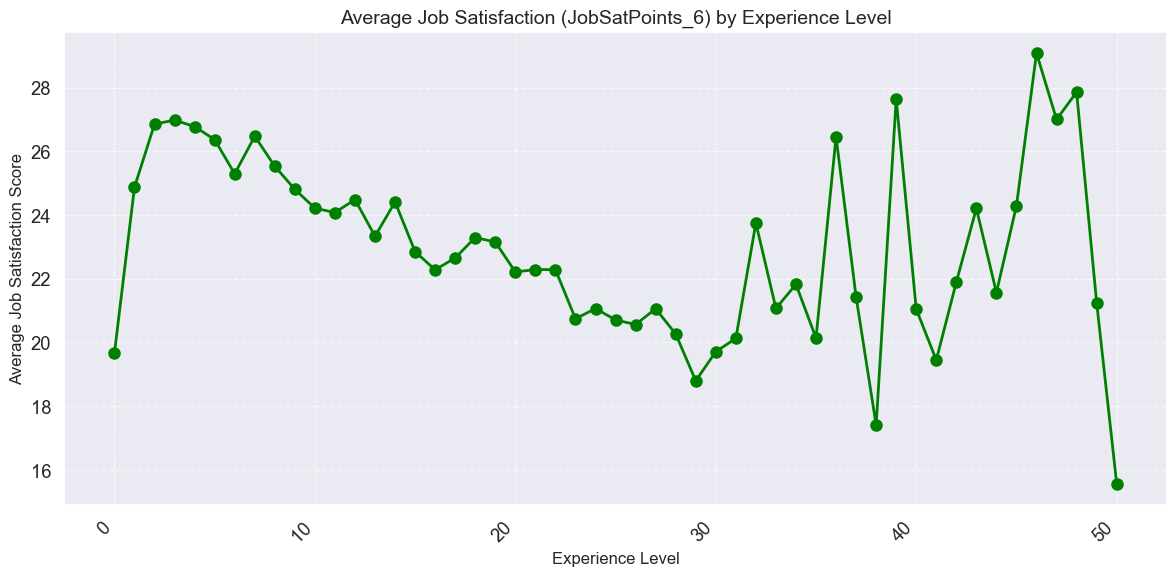

In [14]:
## Write your code here
# Group by WorkExp and calculate mean JobSatPoints_6 for each experience level
exp_sat_mean = df.groupby('WorkExp')['JobSatPoints_6'].mean().reset_index()

# Create the line chart
plt.figure(figsize=(12, 6))
plt.plot(exp_sat_mean['WorkExp'], exp_sat_mean['JobSatPoints_6'],
         marker='o', linewidth=2, markersize=8, color='green')

# Customize the chart
plt.title('Average Job Satisfaction (JobSatPoints_6) by Experience Level', fontsize=14)
plt.xlabel('Experience Level', fontsize=12)
plt.ylabel('Average Job Satisfaction Score', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.7)

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()



#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


このラボでは、補償と仕事の満足度の傾向を分析し、特にこれらのメトリックがラインチャートを使用して年齢と経験レベルとどのように変化するかを探求することに焦点を当てました。

### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
